In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# Create a simple Dataset
hours = np.array([2, 4, 6,  8, 10]).reshape(-1, 1) #changing dimention
marks = np.array([55, 60, 70, 80, 88])

hours, marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

In [4]:
# Train a Linear Regression Model
    # Here hours(X) is features and marks(Y) is results. Y = mX+c . 
    # After fiting linear model will calculate the m and c.
model = LinearRegression()
model.fit(hours, marks)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
# View the learned parameters (c and m)
print("m: ", model.coef_[0])
print("c: ", model.intercept_)

m:  4.3
c:  44.8


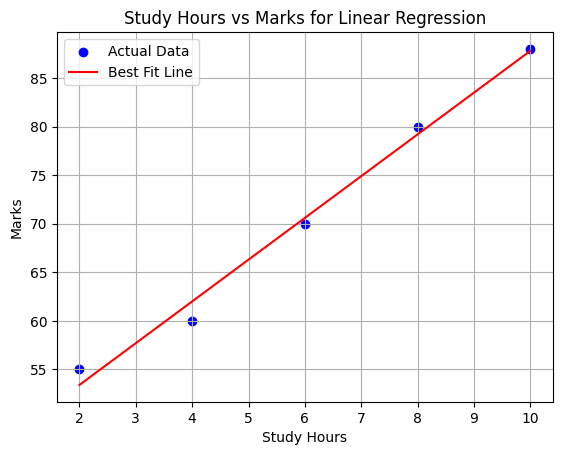

In [6]:
# Viualize the best Fit Line
plt.scatter(hours, marks, color='blue', label='Actual Data')

predicted_marks = model.predict(hours)

plt.plot(hours, predicted_marks, color='red', label='Best Fit Line')

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks for Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# predict Marks for a new student
new_hours = np.array([[7]])
prediction = model.predict(new_hours)
print("Predicted Marks: ", prediction[0])

Predicted Marks:  74.89999999999999


In [8]:
# Compute the cost (Mean Squared Error) using a library
from sklearn.metrics import mean_squared_error

pred_marks = model.predict(hours)
mse_lin = mean_squared_error(marks, pred_marks)
print("MSE for Linear Regression", mse_lin)

MSE for Linear Regression 1.5200000000000033


In [13]:
#Use a Stochastic Gradient-Descent-Based Model – SGDRegressor 
    # This model is mostly used for complex datasets and non-linear regresson

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(
    max_iter = 1000,
    learning_rate = "invscaling",
    eta0 = 0.01,
    random_state = 42
)

sgd_reg.fit(hours, marks)
print("m: ", sgd_reg.coef_[0])
print("c: ",sgd_reg.intercept_[0])

pred_sgd = sgd_reg.predict(hours)
mse_sgd = mean_squared_error(marks,pred_sgd)

print("MSE of SGDRegressor: ", mse_sgd)

m:  5.698065492806587
c:  34.475265427340794
MSE of SGDRegressor:  20.906115830567398


c:\Users\arrah\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


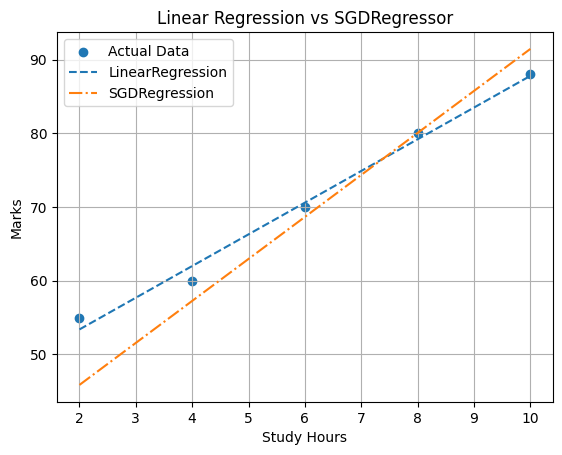

In [13]:
# Compare both lines Visually of liner and Gradient
plt.scatter(hours, marks, label="Actual Data")

plt.plot(hours, pred_marks, label="LinearRegression", linestyle="--")
plt.plot(hours, pred_sgd, label="SGDRegression", linestyle="-.")

plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Linear Regression vs SGDRegressor")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Regression Evaluation Metrics (R², MAE, RMSE)
from sklearn.metrics import mean_absolute_error, r2_score

# compute metrics

mae = mean_absolute_error(marks, pred_marks)
mse = mean_squared_error(marks, pred_marks)
rmse = np.sqrt(mse)
r2 = r2_score(marks, pred_marks)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

MAE: 1.040000000000002
MSE: 1.5200000000000033
RMSE: 1.2328828005937966
R^2: 0.9898286937901499
